!pip install pandas

 !pip install sklearn

!pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [ ]:
(X_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 12s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

[6]


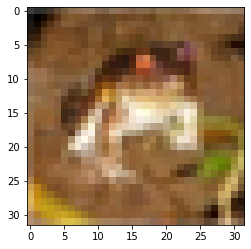

In [ ]:
plt.imshow(X_train[0])
print(y_train[0])

In [ ]:
y=np.squeeze(y_train)

In [ ]:
y.shape

(50000,)

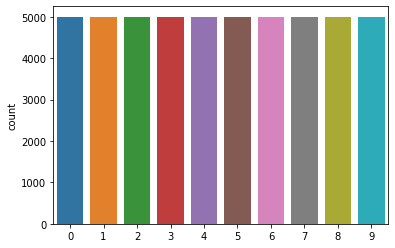

In [ ]:
sns.countplot(y)

DATA VISUALISATIOn

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


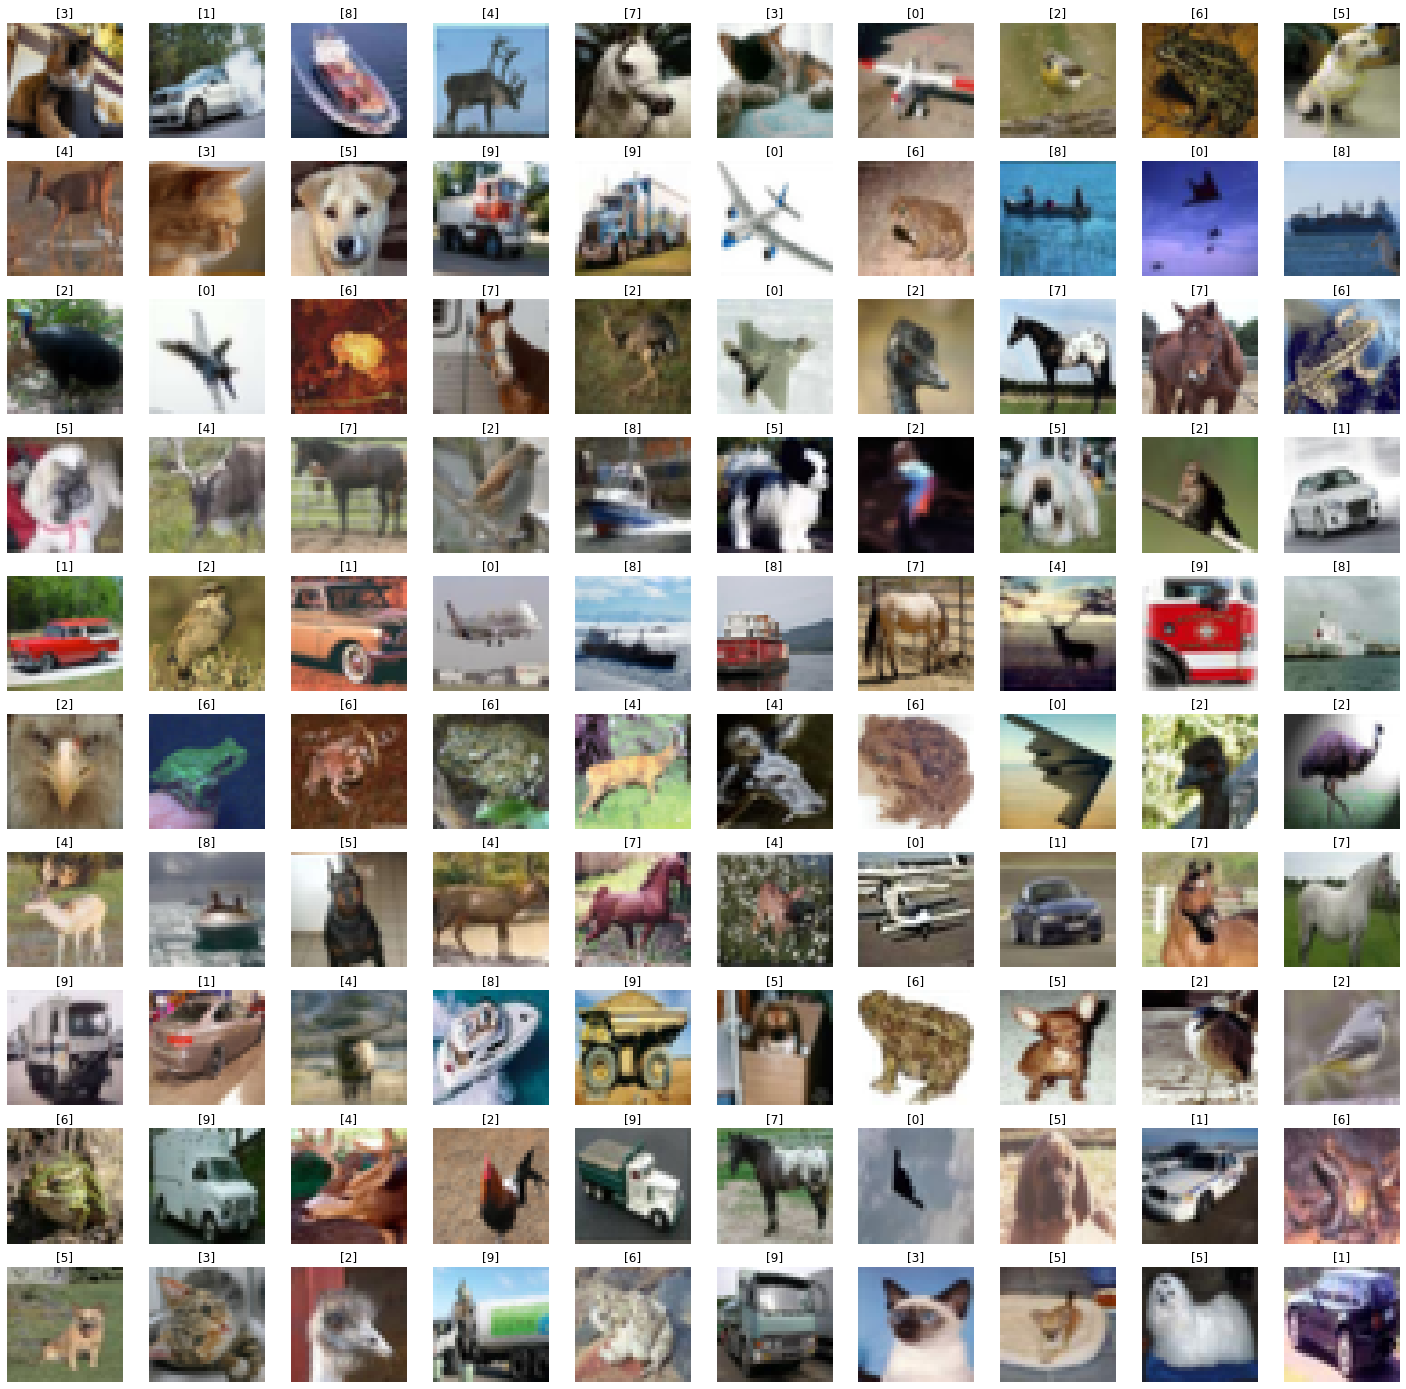

In [ ]:
W_grid=10
L_grid=10

fig,axes=plt.subplots(L_grid,W_grid,figsize=(25,25))
axes=axes.ravel()
number=len(X_train)
for i in np.arange(0,W_grid*L_grid):
    index=np.random.randint(0,number)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')


DATA PREPROCESSING

In [ ]:
from keras.utils.np_utils import to_categorical
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

#NORMALISATION

In [ ]:
# Normalize the data
X_train = X_train / 255.0
x_test = x_test / 255.0

In [ ]:
X_train[1][1]

array([[0.54901961, 0.62745098, 0.6627451 ],
       [0.56862745, 0.6       , 0.60392157],
       [0.49019608, 0.49019608, 0.4627451 ],
       [0.48627451, 0.50588235, 0.51764706],
       [0.58823529, 0.63137255, 0.67843137],
       [0.59607843, 0.64313725, 0.68627451],
       [0.68235294, 0.7372549 , 0.78431373],
       [0.69803922, 0.74117647, 0.76862745],
       [0.5254902 , 0.54509804, 0.5372549 ],
       [0.43137255, 0.43529412, 0.4       ],
       [0.52156863, 0.49803922, 0.47058824],
       [0.63921569, 0.61176471, 0.61176471],
       [0.75294118, 0.75294118, 0.73333333],
       [0.85490196, 0.85882353, 0.84313725],
       [0.94117647, 0.94509804, 0.93333333],
       [0.96078431, 0.96470588, 0.96078431],
       [0.94509804, 0.94901961, 0.9372549 ],
       [0.93333333, 0.9372549 , 0.92156863],
       [0.91764706, 0.92156863, 0.89803922],
       [0.88627451, 0.89019608, 0.8627451 ],
       [0.55686275, 0.56078431, 0.53333333],
       [0.37647059, 0.38039216, 0.33333333],
       [0.

In [ ]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1)

DATA AUGMENTATION

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1,                      # Randomly zoom image 
        width_shift_range=0.1,                  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,                # randomly shift images vertically (fraction of total height))
                          )
datagen.fit(X_train)

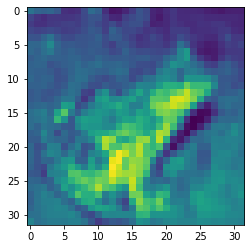

In [ ]:
 plt.imshow(X_train[1][:,:,0])

DEFINING THE MODEL

In [ ]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size = (5,5), padding = 'Same', activation= 'relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size = (5,5), padding = 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))





In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

In [ ]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [ ]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
epochs = 40 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 200

In [ ]:
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=None
                              , callbacks=[learning_rate_reduction])

Epoch 1/40
225/225 [==============================] - 32s 143ms/step - loss: 1.7782 - accuracy: 0.3580 - val_loss: 1.5713 - val_accuracy: 0.4320
Epoch 2/40
225/225 [==============================] - 31s 139ms/step - loss: 1.5592 - accuracy: 0.4389 - val_loss: 1.3643 - val_accuracy: 0.5176
Epoch 3/40
225/225 [==============================] - 32s 143ms/step - loss: 1.4015 - accuracy: 0.4995 - val_loss: 1.1702 - val_accuracy: 0.5848
Epoch 4/40
225/225 [==============================] - 31s 138ms/step - loss: 1.2685 - accuracy: 0.5474 - val_loss: 1.0900 - val_accuracy: 0.6202
Epoch 5/40
225/225 [==============================] - 33s 145ms/step - loss: 1.1728 - accuracy: 0.5860 - val_loss: 1.0356 - val_accuracy: 0.6328
Epoch 6/40
225/225 [==============================] - 31s 140ms/step - loss: 1.0714 - accuracy: 0.6264 - val_loss: 1.0311 - val_accuracy: 0.6536
Epoch 7/40
225/225 [==============================] - 31s 140ms/step - loss: 1.0011 - accuracy: 0.6541 - val_loss: 0.9426 - val_ac

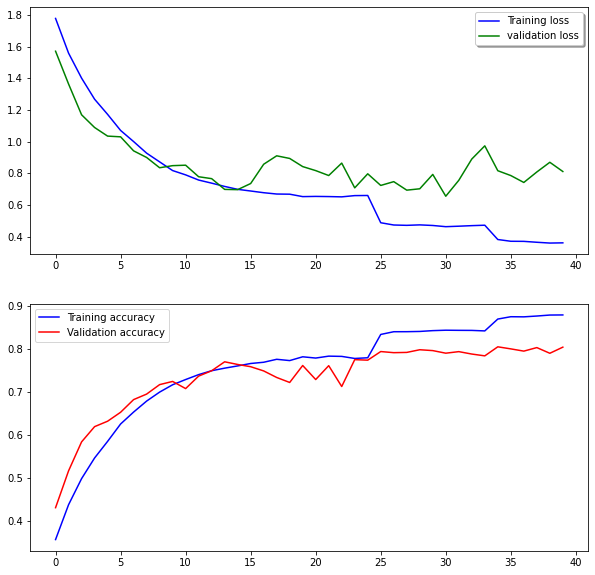

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(10,10))
#ax[0].xlabel('xlabel', fontsize=18)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='g', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend1 = ax[1].legend(loc='best', shadow=False)

In [ ]:
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)

In [ ]:
Y_pred_classes[0]

3

In [ ]:
Y_true[0]

3

In [ ]:
evaluation=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 285us/step


In [ ]:
print("Test accuracy :{} %".format(evaluation[1]*100))

Test accuracy :80.94000220298767 %


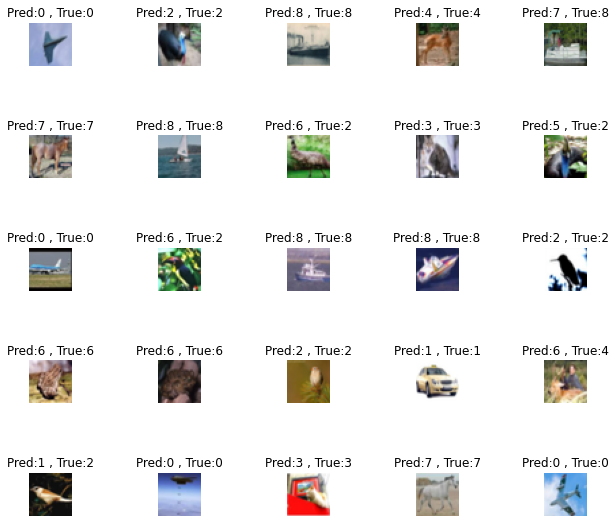

In [ ]:
W_grid=5
L_grid=5

fig,axes=plt.subplots(L_grid,W_grid,figsize=(10,10))
axes=axes.ravel()
number=len(x_test)
for i in np.arange(0,W_grid*L_grid):
    index=np.random.randint(0,number)
    axes[i].imshow(x_test[index])
    axes[i].set_title("Pred:{} , True:{}".format(Y_pred_classes[index],Y_true[index]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=2)


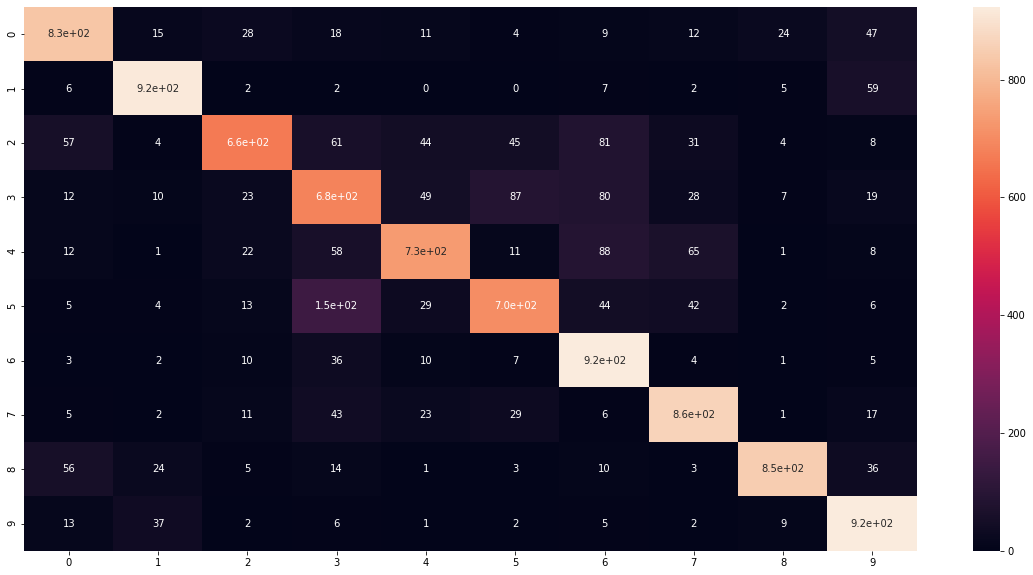

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_true,Y_pred_classes)
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot  =True)

In [ ]:
model.save('my_model.h5') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
